In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt  
from scipy.stats import norm  
import keras
from keras.models import Sequential
from keras.initializers import VarianceScaling,RandomNormal
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D
from keras.layers import UpSampling2D, Reshape, Lambda, Flatten, Activation
from keras.models import Model  
from keras.optimizers import SGD, Adadelta, Adagrad,Adam
from keras import backend as K  
from keras import objectives  
from keras.utils.vis_utils import plot_model  
from keras.utils import np_utils, generic_utils
import sys 
import tensorflow as tf
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
import sklearn
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn import manifold, datasets
from sklearn.utils import check_random_state
from sklearn import metrics

Using TensorFlow backend.


In [2]:
path = os.listdir('cstor/xsede/users/xs-haosun/SDSS_2000/')
#pick up the 1st image to have a look   
path_now = path[0]
a = np.load('cstor/xsede/users/xs-haosun/SDSS_2000/'+str(path_now))
Obj_ID = []
Image = []
Class = []
Redshift = []
for i in range(len(path)):
    path_now = path[i]
    a = np.load('cstor/xsede/users/xs-haosun/SDSS_2000/'+str(path_now))
    for j in range(a.shape[0]):
        Obj_ID.append(a[j]['objID'])
        Image.append(a[j]['image'])
        Class.append(a[j]['class'])
        Redshift.append(a[j]['z'])
Obj_ID = np.asarray(Obj_ID)
Image = np.asarray(Image)
Class = np.asarray(Class)
Redshift = np.asarray(Redshift)
Class[Class=='STAR'] = 0
Class[Class=='GALAXY'] = 1
Class[Class=='QSO'] = 2
Class = Class.astype(int)

Image_RGB = np.empty((len(Image),64,64,3))#(14142,64,64,3) RGB images
for i in range(len(Image)):
    #b[i] = np.stack((a[i][1][0],a[i][1][1],a[i][1][2],a[i][1][3],a[i][1][4]),axis=-1)
    Image_RGB[i] = np.stack((Image[i][3],Image[i][2],Image[i][1]),axis=-1)


for i in range(len(Image_RGB)):
    if True in np.isnan(Image_RGB[i]).reshape(64*64*3):
        print(i)
        Image_RGB[i][np.isnan(Image_RGB[i])==True]=np.mean(Image_RGB[i-1])
        
Image_RGB -= np.mean(Image_RGB)
Image_RGB /= np.max(Image_RGB)

8645


In [3]:
label = np_utils.to_categorical(Class, 3)
data = Image_RGB
index = [i for i in range(len(data))]
#random.shuffle(index)
train_data = data[index]
train_label = label[index]
Class = Class[index]
Redshift = Redshift[index]
print('train_data.shape:',train_data.shape)
print('train_label.shape:',train_label.shape)

train_data.shape: (14142, 64, 64, 3)
train_label.shape: (14142, 3)


Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 14s - loss: -6833.8112 - val_loss: -6585.1245
Epoch 2/50
12000/12000 [==============================] - 10s - loss: -7658.0213 - val_loss: -8001.7800
Epoch 3/50
12000/12000 [==============================] - 11s - loss: -7974.7287 - val_loss: -7961.4905
Epoch 4/50
12000/12000 [==============================] - 10s - loss: -7983.5473 - val_loss: -7818.6855
Epoch 5/50
12000/12000 [==============================] - 10s - loss: -7987.9378 - val_loss: -8010.9389
Epoch 6/50
12000/12000 [==============================] - 10s - loss: -8009.6788 - val_loss: -7986.1754
Epoch 7/50
12000/12000 [==============================] - 10s - loss: -8012.5966 - val_loss: -8064.2432
Epoch 8/50
12000/12000 [==============================] - 10s - loss: -8015.1434 - val_loss: -8008.0856
Epoch 9/50
12000/12000 [==============================] - 10s - loss: -8040.6241 - val_loss: -8062.6868
Epoch 10/50
120

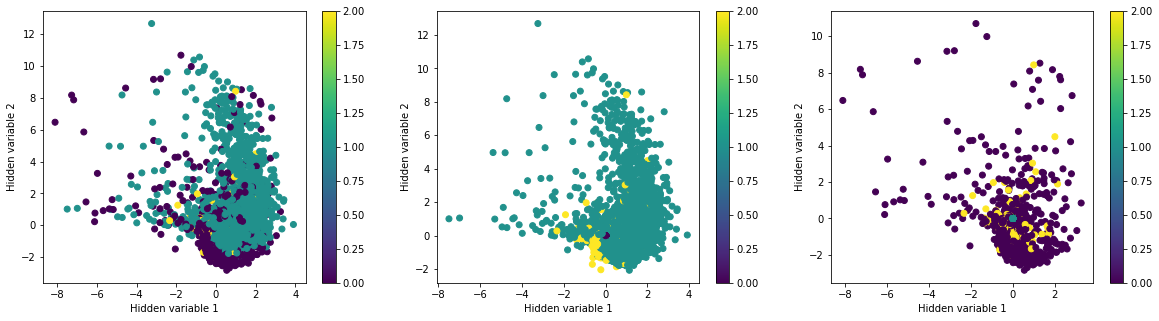

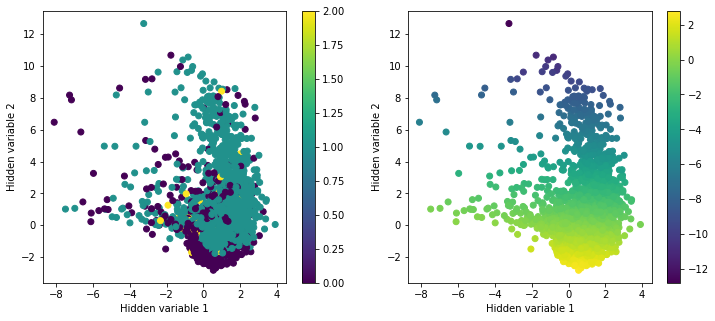

10000


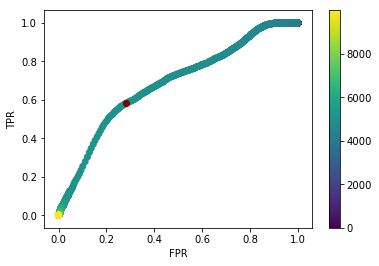

AUC: 0.681350134071
10000


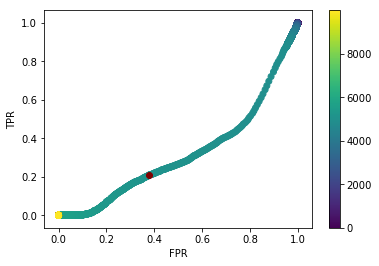

AUC: 0.318649865929
xunhuan =  0 this time, the AUC is: 0.681350134071
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 12s - loss: -7351.0600 - val_loss: -7789.1014
Epoch 2/50
12000/12000 [==============================] - 10s - loss: -7803.2878 - val_loss: -7976.4955
Epoch 3/50
12000/12000 [==============================] - 10s - loss: -7909.5592 - val_loss: -7997.0148
Epoch 4/50
12000/12000 [==============================] - 10s - loss: -7941.7484 - val_loss: -8046.9046
Epoch 5/50
12000/12000 [==============================] - 11s - loss: -7970.8929 - val_loss: -7943.0526
Epoch 6/50
12000/12000 [==============================] - 10s - loss: -8000.8340 - val_loss: -8052.4386
Epoch 7/50
12000/12000 [==============================] - 10s - loss: -8006.2515 - val_loss: -8039.4421
Epoch 8/50
12000/12000 [==============================] - 10s - loss: -8022.4918 - val_loss: -8040.4578
Epoch 9/50
12000/12000 [========================

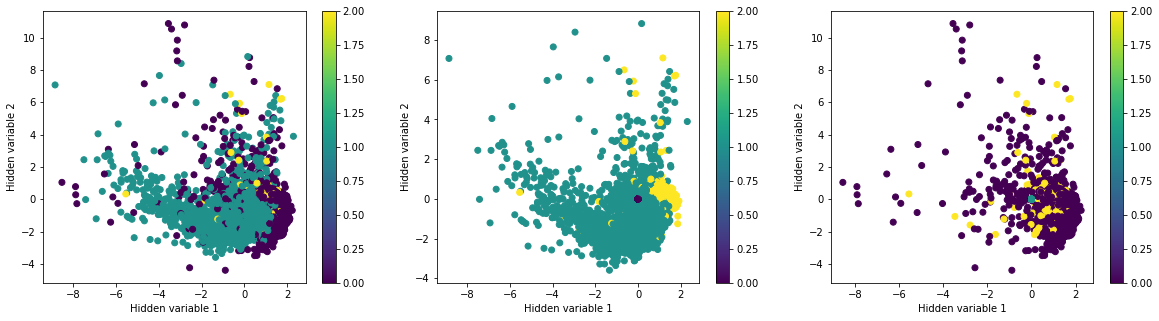

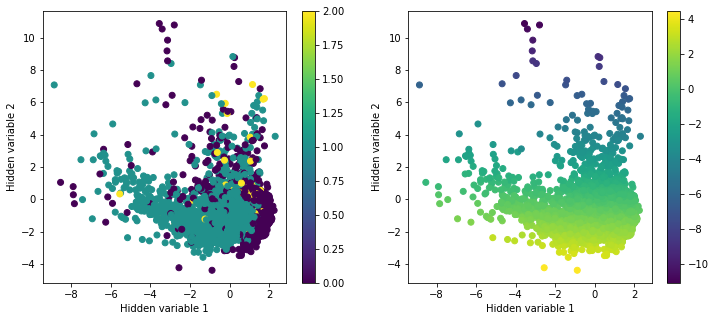

10000


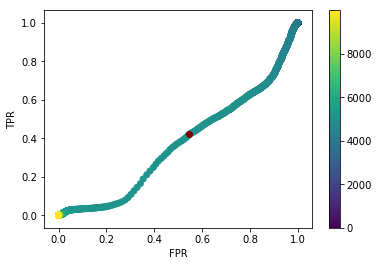

AUC: 0.367182670179
10000


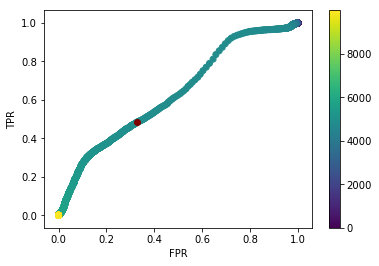

AUC: 0.632817329821
xunhuan =  1 this time, the AUC is: 0.632817329821
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 11s - loss: -7087.0244 - val_loss: -7342.2230
Epoch 2/50
12000/12000 [==============================] - 9s - loss: -7842.9700 - val_loss: -7906.4277 - loss: -78
Epoch 3/50
12000/12000 [==============================] - 9s - loss: -7960.5027 - val_loss: -8042.9320
Epoch 4/50
12000/12000 [==============================] - 10s - loss: -7983.1561 - val_loss: -8039.6339
Epoch 5/50
12000/12000 [==============================] - 10s - loss: -8011.9489 - val_loss: -8037.9059
Epoch 6/50
12000/12000 [==============================] - 10s - loss: -8023.6395 - val_loss: -8064.0030
Epoch 7/50
12000/12000 [==============================] - 10s - loss: -8028.7394 - val_loss: -8042.523280
Epoch 8/50
12000/12000 [==============================] - 10s - loss: -8026.5887 - val_loss: -8068.6617
Epoch 9/50
12000/12000 [============

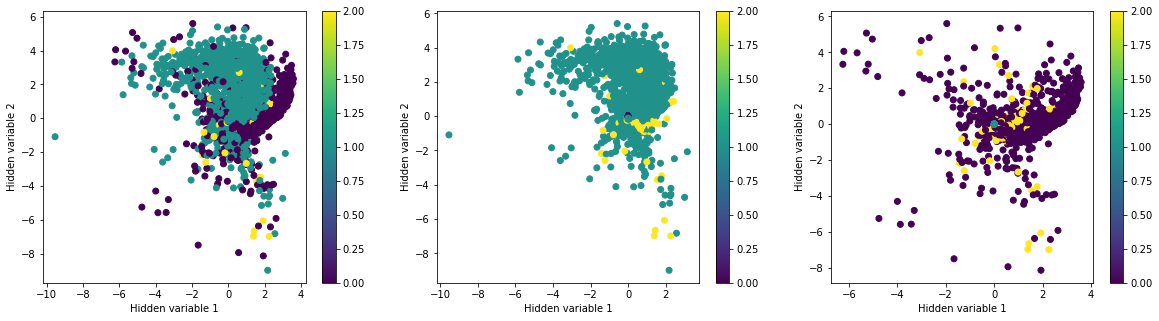

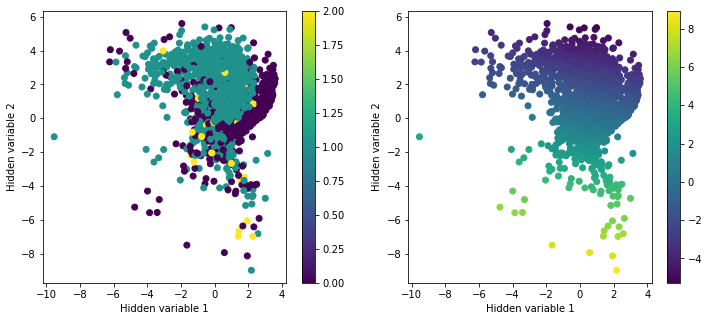

10000


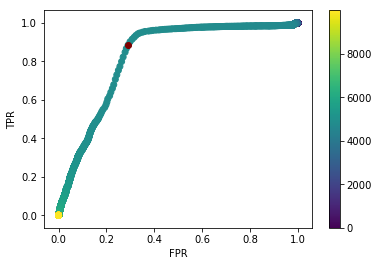

AUC: 0.822747855349
10000


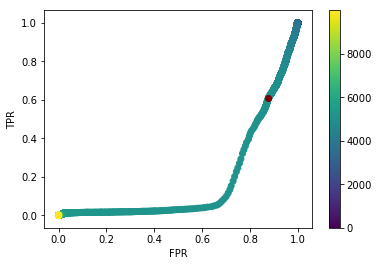

AUC: 0.177252144651
xunhuan =  2 this time, the AUC is: 0.822747855349
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 11s - loss: -7321.9985 - val_loss: -7908.02817314.126
Epoch 2/50
12000/12000 [==============================] - 9s - loss: -7882.5082 - val_loss: -7846.2087
Epoch 3/50
12000/12000 [==============================] - 10s - loss: -7979.2292 - val_loss: -7931.0934
Epoch 4/50
12000/12000 [==============================] - 10s - loss: -7999.4485 - val_loss: -8062.4997
Epoch 5/50
12000/12000 [==============================] - 11s - loss: -8004.3829 - val_loss: -8057.5211
Epoch 6/50
12000/12000 [==============================] - 10s - loss: -7980.5596 - val_loss: -8058.0096
Epoch 7/50
12000/12000 [==============================] - 10s - loss: -8012.3344 - val_loss: -8047.8651
Epoch 8/50
12000/12000 [==============================] - 10s - loss: -8020.3265 - val_loss: -8032.8477
Epoch 9/50
12000/12000 [=================

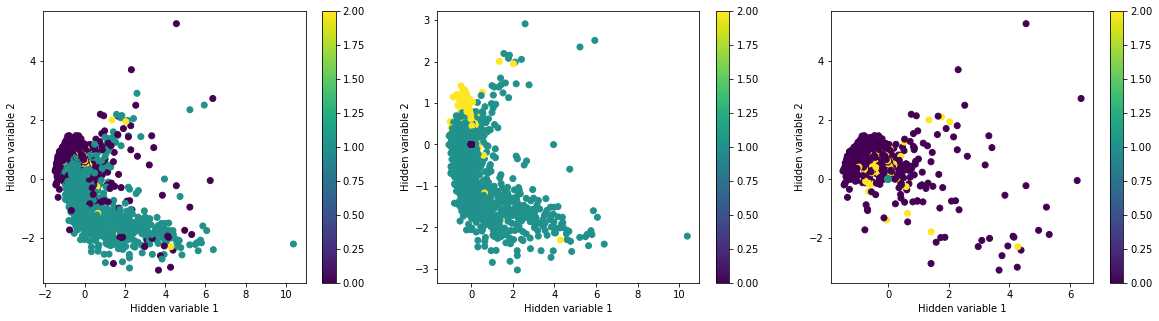

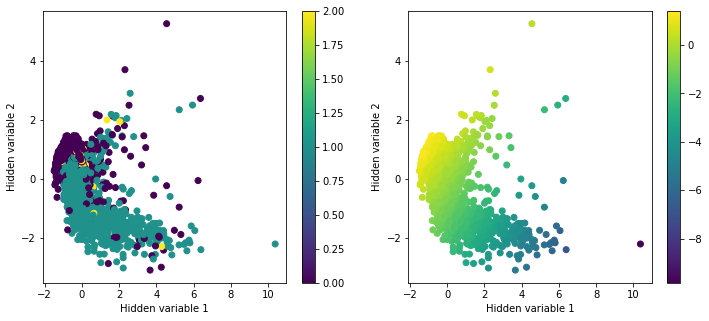

10000


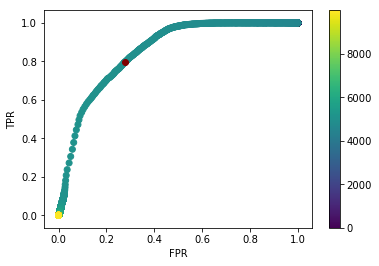

AUC: 0.850009409554
10000


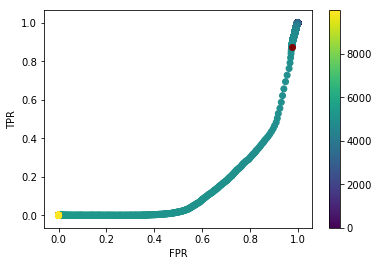

AUC: 0.149990590446
xunhuan =  3 this time, the AUC is: 0.850009409554
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 11s - loss: -7389.4206 - val_loss: -7353.5645
Epoch 2/50
12000/12000 [==============================] - 9s - loss: -7902.9914 - val_loss: -7946.5972-7887.53
Epoch 3/50
12000/12000 [==============================] - 9s - loss: -7953.8129 - val_loss: -7826.8605
Epoch 4/50
12000/12000 [==============================] - 9s - loss: -7966.3614 - val_loss: -8035.9085
Epoch 5/50
12000/12000 [==============================] - 10s - loss: -8018.1347 - val_loss: -8038.9353
Epoch 6/50
12000/12000 [==============================] - 10s - loss: -8000.3141 - val_loss: -8050.1741
Epoch 7/50
12000/12000 [==============================] - 10s - loss: -8015.1947 - val_loss: -8055.4839
Epoch 8/50
12000/12000 [==============================] - 10s - loss: -8033.3727 - val_loss: -8073.1476
Epoch 9/50
12000/12000 [===================

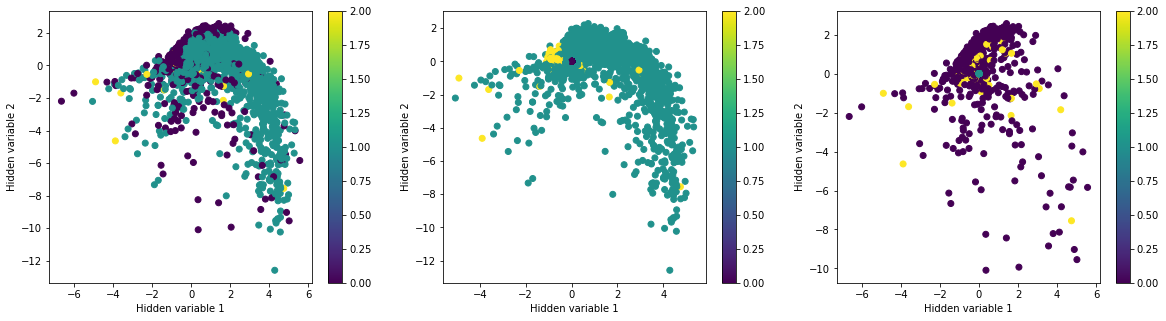

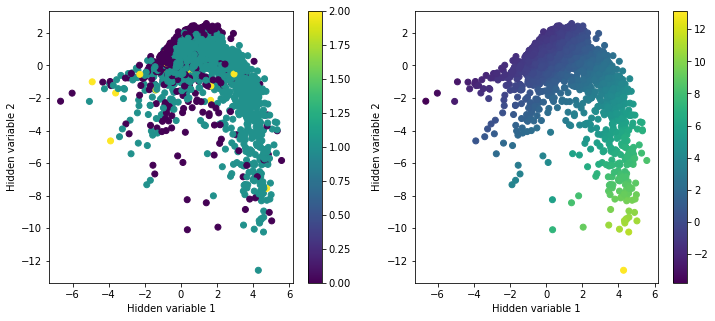

10000


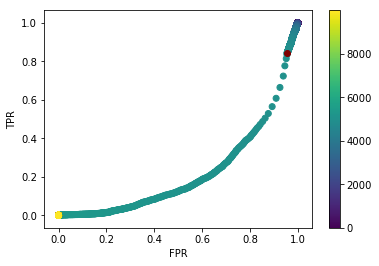

AUC: 0.22000977294
10000


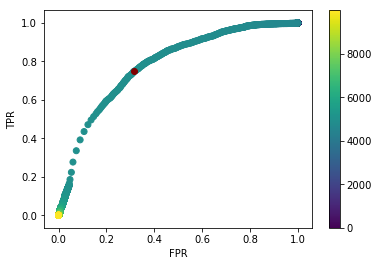

AUC: 0.77999022706
xunhuan =  4 this time, the AUC is: 0.77999022706
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 12s - loss: -6689.9251 - val_loss: -7918.9560
Epoch 2/50
12000/12000 [==============================] - 9s - loss: -7844.1301 - val_loss: -7959.7487
Epoch 3/50
12000/12000 [==============================] - 10s - loss: -7930.9956 - val_loss: -7933.8683
Epoch 4/50
12000/12000 [==============================] - 10s - loss: -7981.6492 - val_loss: -8029.2085
Epoch 5/50
12000/12000 [==============================] - 10s - loss: -8004.5656 - val_loss: -8057.6179
Epoch 6/50
12000/12000 [==============================] - 12s - loss: -8018.2540 - val_loss: -7911.7372
Epoch 7/50
12000/12000 [==============================] - 11s - loss: -8005.5359 - val_loss: -8054.8790
Epoch 8/50
12000/12000 [==============================] - 10s - loss: -8028.6663 - val_loss: -8073.7920
Epoch 9/50
12000/12000 [===========================

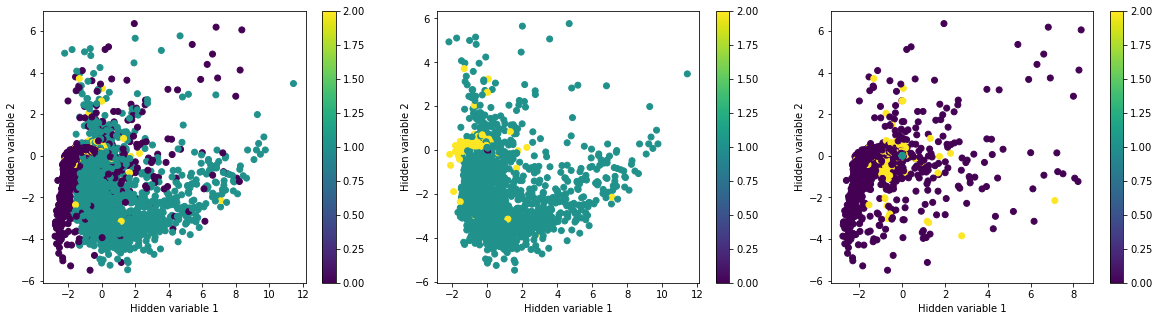

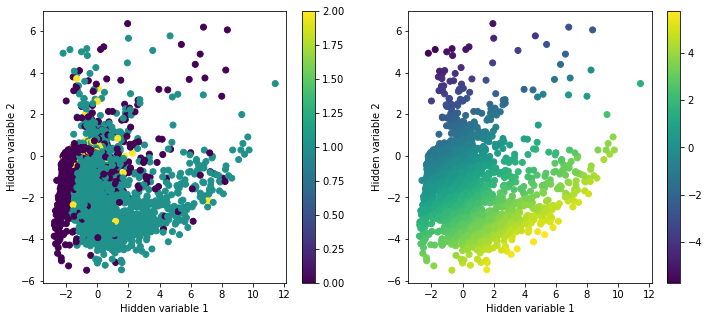

10000


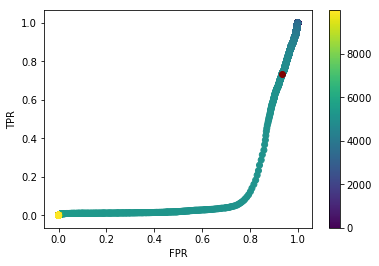

AUC: 0.130093409558
10000


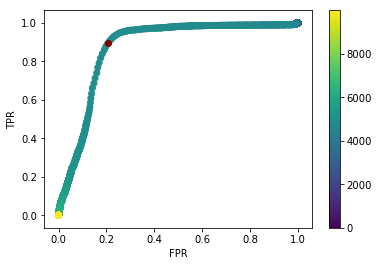

AUC: 0.869906590442
xunhuan =  5 this time, the AUC is: 0.869906590442
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 12s - loss: -7356.6431 - val_loss: -7830.1275
Epoch 2/50
12000/12000 [==============================] - 10s - loss: -7886.6150 - val_loss: -7962.7090
Epoch 3/50
12000/12000 [==============================] - 10s - loss: -7918.7871 - val_loss: -7893.8544
Epoch 4/50
12000/12000 [==============================] - 11s - loss: -7990.2327 - val_loss: -8016.3237
Epoch 5/50
12000/12000 [==============================] - 10s - loss: -7977.3290 - val_loss: -7998.9471
Epoch 6/50
12000/12000 [==============================] - 11s - loss: -8005.0737 - val_loss: -8012.9602
Epoch 7/50
12000/12000 [==============================] - 11s - loss: -8019.3161 - val_loss: -8057.4175
Epoch 8/50
12000/12000 [==============================] - 11s - loss: -8020.3910 - val_loss: -8058.7456
Epoch 9/50
12000/12000 [========================

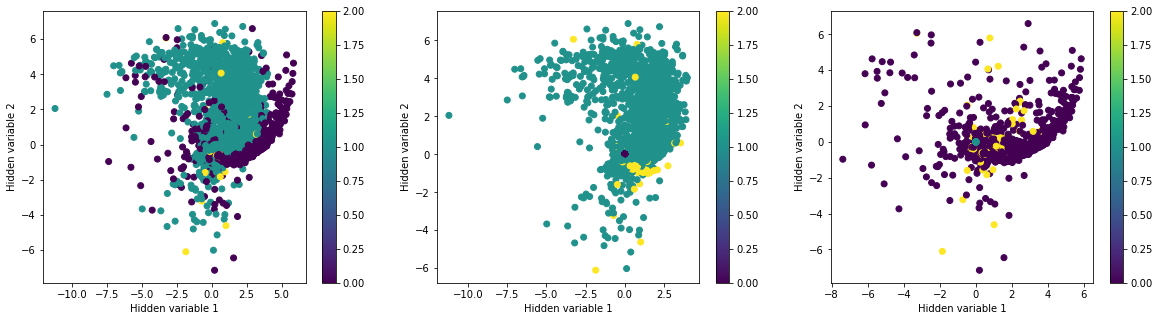

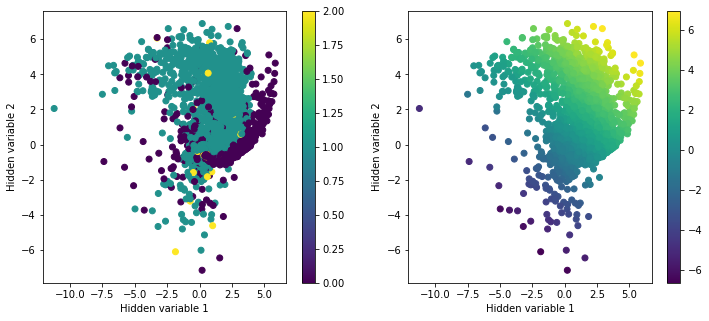

10000


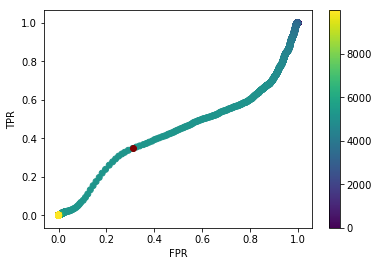

AUC: 0.433339165483
10000


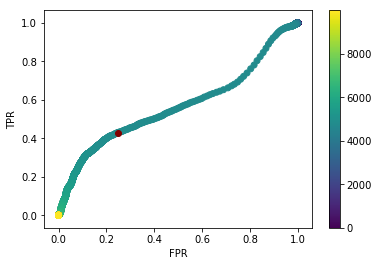

AUC: 0.566660834517
xunhuan =  6 this time, the AUC is: 0.566660834517
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 12s - loss: -7255.5584 - val_loss: -7464.2407
Epoch 2/50
12000/12000 [==============================] - 10s - loss: -7759.1257 - val_loss: -7634.5318
Epoch 3/50
12000/12000 [==============================] - 11s - loss: -7908.4068 - val_loss: -7977.28657907.7
Epoch 4/50
12000/12000 [==============================] - 10s - loss: -7947.4460 - val_loss: -8027.6954
Epoch 5/50
12000/12000 [==============================] - 11s - loss: -7987.3972 - val_loss: -8046.5727
Epoch 6/50
12000/12000 [==============================] - 11s - loss: -8007.3508 - val_loss: -7974.5684
Epoch 7/50
12000/12000 [==============================] - 10s - loss: -7988.7863 - val_loss: -8035.8762
Epoch 8/50
12000/12000 [==============================] - 11s - loss: -8023.3057 - val_loss: -7998.7763
Epoch 9/50
12000/12000 [==================

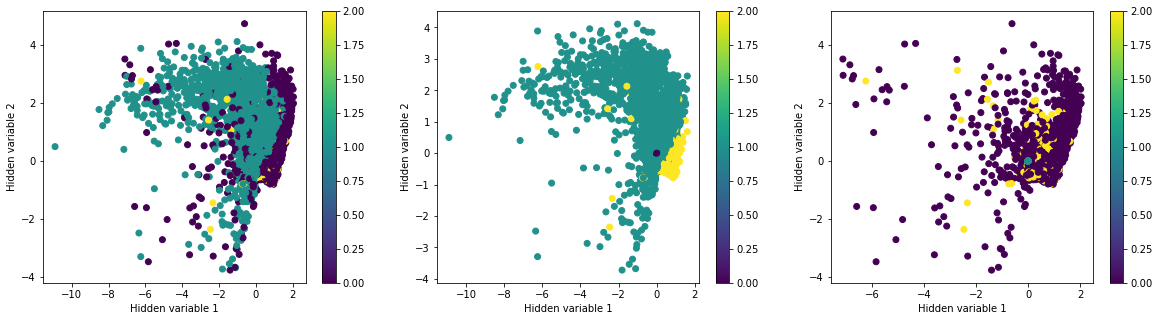

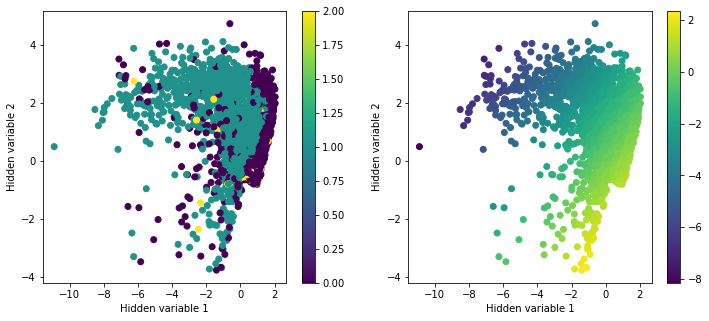

10000


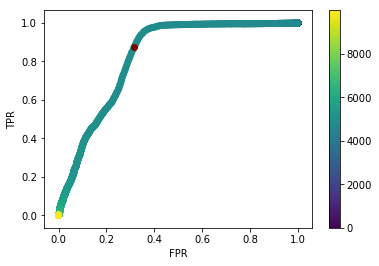

AUC: 0.821378083686
10000


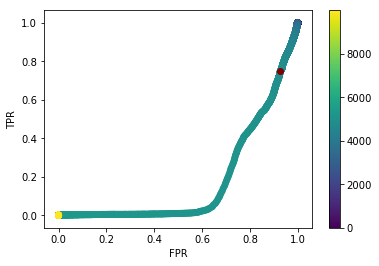

AUC: 0.178621916314
xunhuan =  7 this time, the AUC is: 0.821378083686
Train on 12000 samples, validate on 2100 samples
Epoch 1/50
12000/12000 [==============================] - 12s - loss: -7183.5403 - val_loss: -7751.9778
Epoch 2/50
12000/12000 [==============================] - 10s - loss: -7725.4253 - val_loss: -8003.2800
Epoch 3/50
12000/12000 [==============================] - 10s - loss: -7947.9579 - val_loss: -7979.6381
Epoch 4/50
12000/12000 [==============================] - 12s - loss: -7982.2985 - val_loss: -8043.2068
Epoch 5/50
12000/12000 [==============================] - 11s - loss: -7984.8534 - val_loss: -8054.9887
Epoch 6/50
12000/12000 [==============================] - 11s - loss: -8015.9622 - val_loss: -8073.9317
Epoch 7/50
12000/12000 [==============================] - 10s - loss: -8014.6141 - val_loss: -8027.8982
Epoch 8/50
12000/12000 [==============================] - 10s - loss: -8021.9449 - val_loss: -8050.9813
Epoch 9/50
12000/12000 [========================

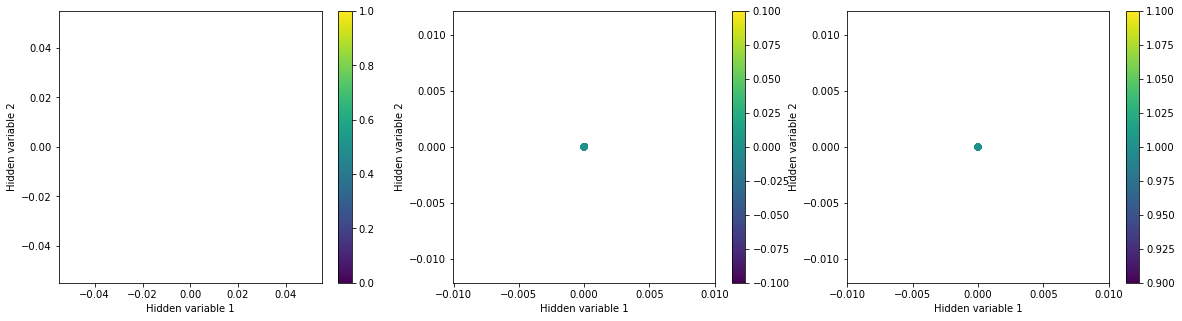

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [4]:
AUC_all = []
for xunhuan in range(10):
    batch_size =100
    latent_dim = 2
    nb_epoch = 50  
    epsilon_std = 0.1  
    intermediate_dim =256
    original_dim = 64*64

    #USE = 'autoencoder'
    USE = 'vae'
    #encoder:

    input_img = Input(shape=(64,64,3))


    x = Conv2D(40, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(input_img)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    x = Conv2D(40, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = MaxPooling2D((2, 2),  padding='same')(x)

    #x = Conv2D(5, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    #x = MaxPooling2D((2, 2),  padding='same')(x)

    visual = Flatten()(x)
    h_1 = Dense(intermediate_dim, activation='tanh')(visual)
    encoded = Dense(latent_dim, activation='relu')(h_1)

    #z_mean = Dense(latent_dim)(h_1)
    z_mean = Dense(latent_dim)(h_1)
    z_log_var = Dense(latent_dim)(h_1)

    def sampling(args):   
        z_mean, z_log_var = args  
        epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.,stddev=epsilon_std)
        return z_mean + K.exp(z_log_var / 2)* epsilon

    z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    if USE == 'vae':
        h_3 = Dense(intermediate_dim,activation='tanh')(z)#for VAE

    if USE == 'autoencoder':
        h_3 = Dense(intermediate_dim,activation='tanh')(encoded)#for AE


    h_4 = Dense(20*2*2,activation='relu')(h_3)
    h_5 = Reshape((2,2,20))(h_4)


    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(h_5)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(40, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(80,  (3, 3), activation='tanh',padding='same',kernel_initializer='normal')(x)
    x = UpSampling2D((2, 2))(x)

    decoded = Conv2D(3, (3, 3), activation='tanh', padding='same')(x)

    EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')


    #def vae_loss(x, decoded):  
    #    xent_loss = K.sum(K.sum(objectives.binary_crossentropy(x ,decoded),axis=-1),axis=-1)
    #    kl_loss_1 = -K.sum(K.square(0 - (z_mean)), axis=-1)
    #    kl_loss_2 = K.sum(K.abs(1- K.exp(z_log_var)), axis=-1)
    #    return 1*xent_loss + 0.5*kl_loss_1 + 1*kl_loss_2  
    ### PW loss:
    def vae_loss(x, decoded):  
        xent_loss = K.sum(K.sum(objectives.binary_crossentropy(x ,decoded),axis=-1),axis=-1)#the cross entropy loss, can also use MSE
        w_loss_d1_mean = K.sum(K.square((z_mean)), axis=-1) #first part of PW loss
        m = K.constant(0) #hyperparameter: mean
        s = K.constant(1) #hyperparameter: std
        w_loss_d1_var = K.sum((        
            K.exp(-K.square(m/s)-K.square(z_mean)/K.constant(2)/(K.square(s)+K.exp(z_log_var)))*
                (
                -K.constant(2*np.sqrt(2))*K.exp((m*(-K.constant(2)*z_mean*K.square(s)+m*(K.square(s)+K.constant(2)*K.exp(z_log_var))))/(K.constant(2)*K.square(s)*(K.square(s)+K.exp(z_log_var))))
                -K.constant(2*np.sqrt(2))*K.exp((m*(K.constant(2)*z_mean*K.square(s)+m*(K.square(s)+K.constant(2)*K.exp(z_log_var))))/(K.constant(2)*K.square(s)*(K.square(s)+K.exp(z_log_var))))
                +K.exp(z_log_var/2)*K.exp((K.square(z_mean))/(K.constant(2)*(K.square(s)+K.exp(z_log_var))))*K.sqrt(K.constant(1)/K.square(s)+K.constant(1)/K.exp(z_log_var))
                +K.exp(K.square(m/s)+(K.square(z_mean))/(K.constant(2)*(K.square(s)+K.exp(z_log_var))))*K.exp(z_log_var/2)*s*(K.constant(1)/s+K.constant(2)/K.exp(z_log_var/2))*K.sqrt(K.constant(1)/K.square(s)+K.constant(1)/K.exp(z_log_var))
                )
            )
            /(K.constant(4)*K.constant(np.sqrt(np.pi))*s*K.exp(z_log_var/2)*K.sqrt(K.constant(1)/K.square(s)+K.constant(1)/K.exp(z_log_var))), axis=-1)
        #second part of PW loss
        return 1*xent_loss +w_loss_d1_mean+w_loss_d1_var 


    def ae_loss(x, decoded):  
        xent_loss = original_dim * objectives.mean_squared_error(x,decoded)
        return xent_loss

    if USE == 'vae':
        vae = Model(inputs=input_img, outputs=decoded) 
        vae.compile(optimizer='rmsprop', loss=vae_loss) 
        vae.fit(train_data[:12000], train_data[:12000],
                shuffle=True,
                epochs=50,
                batch_size=batch_size,
                validation_data=(train_data[12000:14100],train_data[12000:14100]),callbacks=[EarlyStopping])    

    lower_lim = 0
    upper_lim = 14100

    label_value = np.zeros(len(train_label))
    for i in range(len(label_value)):
        label_value[i] =np.argmax(train_label[i])

    vis = Model(input_img, z_mean)

    # display a 2D plot of the digit classes in the latent space  
    x_vis = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)

    x_vis_1 = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)  
    x_vis_1[label_value[lower_lim:upper_lim]<1]=0

    x_vis_2 = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)  
    x_vis_2[label_value[lower_lim:upper_lim]==1]=0

    plt.figure(figsize=(20, 5))

    ax = plt.subplot(1,3,1)
    plt.scatter( x_vis[:, 0] ,x_vis[:, 1],c=label_value[lower_lim:upper_lim])
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    ax = plt.subplot(1,3,2)
    plt.scatter( x_vis_1[:, 0] ,x_vis_1[:, 1],c=label_value[lower_lim:upper_lim])
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    ax = plt.subplot(1,3,3)
    plt.scatter( x_vis_2[:, 0] ,x_vis_2[:, 1],c=label_value[lower_lim:upper_lim])
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    plt.show()
    
    lower_lim = 0
    upper_lim = 14100


    vis = Model(input_img, z_mean)
    # display a 2D plot of the digit classes in the latent space
    x_vis = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)
    n_neighbors = 10
    n_components = 1
    isomap = manifold.Isomap(n_neighbors, n_components)
    hid_pred = vis.predict(train_data[lower_lim:upper_lim], batch_size=batch_size)
    Y_pred = isomap.fit_transform(hid_pred)


    plt.figure(figsize=(12, 5))

    ax = plt.subplot(1,2,1)
    plt.scatter( x_vis[:, 0] ,x_vis[:, 1],c=label_value[lower_lim:upper_lim])
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    ax = plt.subplot(1,2,2)
    plt.scatter( x_vis[:, 0] ,x_vis[:, 1],c=Y_pred)
    plt.colorbar()
    plt.xlabel("Hidden variable 1")
    plt.ylabel("Hidden variable 2")
    plt.show()
    
    
    Y_pred = -Y_pred
    thr_min = -15
    thr_max = 15
    test_accuracy = 0.003
    test_range = int((thr_max - thr_min)/test_accuracy)
    print(test_range)
    FP = []
    TP = []
    TN = []
    FN = []
    TA = np.ones((Y_pred.shape[0],))
    TA[Class[lower_lim:upper_lim] ==0 ] = 0
    TA[Class[lower_lim:upper_lim] ==2 ] = 0

    for i in range(test_range):
        FP_temp = np.zeros((Y_pred.shape[0]))
        TP_temp = np.zeros((Y_pred.shape[0]))
        TN_temp = np.zeros((Y_pred.shape[0]))
        FN_temp = np.zeros((Y_pred.shape[0]))
        LA = np.zeros((Y_pred.shape[0],))
        thr_now = thr_min+ i*test_accuracy
        LA[Y_pred[:,0] > thr_now] = 1
        for j in range(Y_pred.shape[0]):
            if LA[j]==0:
                if TA[j]==1:
                    FN_temp[j] = 1
                else:
                    TN_temp[j] = 1
            else:
                if TA[j] == 1:
                    TP_temp[j] = 1
                else:
                    FP_temp[j] = 1
        FP.append(FP_temp)
        TP.append(TP_temp)
        TN.append(TN_temp)
        FN.append(FN_temp)

    TPR = np.zeros((test_range,))
    FPR = np.zeros((test_range,))
    TPR = np.sum(TP,axis=-1)/(np.sum(TP,axis=-1)+np.sum(FN,axis=-1))
    FPR = np.sum(FP,axis=-1)/(np.sum(FP,axis=-1)+np.sum(TN,axis=-1))

    plt.scatter(FPR,TPR,c=[i for i in range(test_range)])

    plt.colorbar()
    plt.scatter(FPR[np.argmin((TPR-1)**2 + FPR**2)],TPR[np.argmin((TPR-1)**2 + FPR**2)],c=0,cmap='OrRd_r')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    #argmax, OrRed

    print("AUC:",metrics.auc(FPR, TPR))
    AUC_1 = metrics.auc(FPR, TPR)
    
    Y_pred = -Y_pred
    thr_min = -15
    thr_max = 15
    test_accuracy = 0.003
    test_range = int((thr_max - thr_min)/test_accuracy)
    print(test_range)
    FP = []
    TP = []
    TN = []
    FN = []
    TA = np.ones((Y_pred.shape[0],))
    TA[Class[lower_lim:upper_lim] ==0 ] = 0
    TA[Class[lower_lim:upper_lim] ==2 ] = 0

    for i in range(test_range):
        FP_temp = np.zeros((Y_pred.shape[0]))
        TP_temp = np.zeros((Y_pred.shape[0]))
        TN_temp = np.zeros((Y_pred.shape[0]))
        FN_temp = np.zeros((Y_pred.shape[0]))
        LA = np.zeros((Y_pred.shape[0],))
        thr_now = thr_min+ i*test_accuracy
        LA[Y_pred[:,0] > thr_now] = 1
        for j in range(Y_pred.shape[0]):
            if LA[j]==0:
                if TA[j]==1:
                    FN_temp[j] = 1
                else:
                    TN_temp[j] = 1
            else:
                if TA[j] == 1:
                    TP_temp[j] = 1
                else:
                    FP_temp[j] = 1
        FP.append(FP_temp)
        TP.append(TP_temp)
        TN.append(TN_temp)
        FN.append(FN_temp)

    TPR = np.zeros((test_range,))
    FPR = np.zeros((test_range,))
    TPR = np.sum(TP,axis=-1)/(np.sum(TP,axis=-1)+np.sum(FN,axis=-1))
    FPR = np.sum(FP,axis=-1)/(np.sum(FP,axis=-1)+np.sum(TN,axis=-1))

    plt.scatter(FPR,TPR,c=[i for i in range(test_range)])

    plt.colorbar()
    plt.scatter(FPR[np.argmin((TPR-1)**2 + FPR**2)],TPR[np.argmin((TPR-1)**2 + FPR**2)],c=0,cmap='OrRd_r')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    #argmax, OrRed

    print("AUC:",metrics.auc(FPR, TPR))
    AUC_2 = metrics.auc(FPR, TPR)
    AUC = AUC_2
    if AUC_1>AUC_2:
        AUC = AUC_1
    print("xunhuan = ",xunhuan,"this time, the AUC is:",AUC)
    AUC_all.append(AUC)    

In [ ]:
[0.821378083686,0.566660834517,0.869906590442,0.77999022706,0.850009409554,0.822747855349,0.632817329821,0.681350134071]

MEAN AUC =  0.753107558062


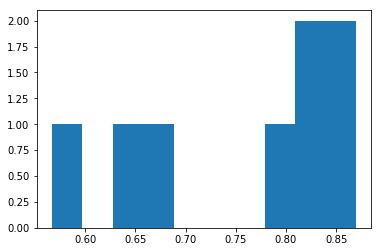

In [8]:
AUC_all = np.asarray(AUC_all)
print("MEAN AUC = ",np.mean(AUC_all))
plt.hist(AUC_all)
plt.show()